## **1. First assignment is for data hand;ing using python, you have to download Task_Data.xlsx file of hockey players from and you have to perform various functions on the data file.**

In [ ]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. First import the excel file 

In [ ]:
#importing file by uploading on drive
df = pd.read_csv('/content/Task2_Data(Q1).csv', encoding='latin-1')

In [ ]:
#printing the dataset
df

### 2. Some values are missing. Remove the rows which do not have the weight of the player and fill na where the DOB is missing.

In [ ]:
df['DOB'].fillna((df['DOB'].bfill()),inplace = True) #Fill the backward value in the missing values of DOB

In [ ]:
df = df.dropna(axis = 0, how ='any', thresh = None, subset = ['Weight'], inplace=False) #deleting rows with empty cells in weights columns
df

In [ ]:
df.to_csv('changed.csv',index=False) #converting output to csv file

###3. Group all the players by their position

In [ ]:
group_pos = df.groupby('Pos')['Pos'].count() 

In [ ]:
print(group_pos)

###4. Find median height of male players and mean weight of female players


In [ ]:
df.groupby(['Team'])['Weight'].mean() # mean of both male and female players

In [ ]:
df.groupby(['Team'])['Height'].median() # median of both male and female players

###5. Make a pivot table on columns of your choice.


In [ ]:
pivot_table1 = pd.pivot_table(data=df,index=['Team'])
pivot_table1

In [ ]:
pivot_table2 = pd.pivot_table(data=df,index=['Country'])
pivot_table2

In [ ]:
pivot_table3 = pd.pivot_table(data=df,index=['Pos'])
pivot_table3

In [ ]:
pivot_table4 = pd.pivot_table(data=df,index=['Prov'])
pivot_table4

###6. First separate male canadian players and female american players and then join the sheets (append ?)


In [ ]:
df.groupby(['Team','Country']).count()

In [ ]:
DF1 = df.loc[(df["Team"]=='Men') & (df["Country"]=='Canada')] #dataframe of male canadian players
DF1

In [ ]:
DF2 = df.loc[(df["Team"]=='Women') & (df["Country"]=='USA')] #dataframe of female american players
DF2

In [ ]:
frames = [DF1,DF2] #storing the dataframes to concatenate them
result = pd.concat(frames) #concatinating both the dataframes
result

In [ ]:
result.to_csv("grouped.csv") #converting result to csv file

##**Q2. Next you will have to make regression models using scikit learn library. You can also go mathematically about it for linear regression model but its not needed.**


###1. Use simple linear regression to predict CO2 emissions using volume and weight separately, plot their graphs and calculate the r values

In [ ]:
df2 = pd.read_csv('/content/Regression Data(Q2_task2).csv')
df2

####**Predicting CO2 emissions using volumne**

In [ ]:
X = df2.iloc[:,2:3].values # X is the Volume column 
Y = df2.iloc[:,-2].values  # Y is the CO2 column

In [ ]:
print(X) 

[[1000]
 [1200]
 [1000]
 [ 900]
 [1500]
 [1000]
 [1400]
 [1500]
 [1500]
 [1600]
 [1100]
 [1300]
 [1000]
 [1600]
 [1600]
 [1600]
 [1600]
 [2200]
 [1600]
 [2000]
 [1600]
 [2000]
 [2100]
 [1600]
 [2000]
 [1500]
 [2000]
 [2000]
 [1600]
 [2000]
 [2100]
 [2000]
 [1600]
 [1600]
 [1600]
 [2500]]


In [ ]:
print(Y)

[ 99  95  95  90 105 105  90  92  98  99  99 101  99  94  97  97  99 104
 104 105  94  99  99  99  99 102 104 114 109 114 115 117 104 108 109 120]


In [ ]:
#Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [ ]:
#Training simple linear regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [ ]:
#predictng test set results
Y_pred = regressor.predict(X_test)

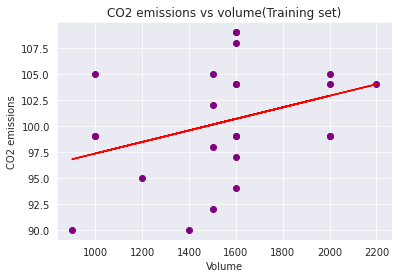

In [ ]:
#visualizing graph for training set
plt.scatter(X_train, Y_train, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('CO2 emissions vs volume(Training set)')
plt.xlabel('Volume')
plt.ylabel('CO2 emissions')
plt.show()

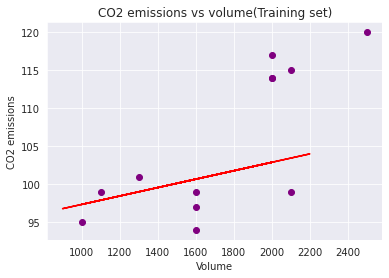

In [ ]:
#visualizing graph for test set
plt.scatter(X_test, Y_test, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('CO2 emissions vs volume(Training set)')
plt.xlabel('Volume')
plt.ylabel('CO2 emissions')
plt.show()

In [ ]:
#predicting r values
from scipy import stats
r1 = stats.linregress(X_train.reshape(1,-1),Y_train)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [ ]:
r1

LinregressResult(slope=0.005543726235741446, intercept=91.80532319391635, rvalue=0.3444526891121132, pvalue=nan, stderr=nan)

####**Predicting CO2 emissions using Weight**

In [ ]:
X1 = df2.iloc[:,3:4].values # X1 is the weight column 
Y1 = df2.iloc[:,-2].values  # Y1 is the CO2 column

In [ ]:
print(X1)

[[ 790]
 [1160]
 [ 929]
 [ 865]
 [1140]
 [ 929]
 [1109]
 [1365]
 [1112]
 [1150]
 [ 980]
 [ 990]
 [1112]
 [1252]
 [1326]
 [1330]
 [1365]
 [1280]
 [1119]
 [1328]
 [1584]
 [1428]
 [1365]
 [1415]
 [1415]
 [1465]
 [1490]
 [1725]
 [1523]
 [1705]
 [1605]
 [1746]
 [1235]
 [1390]
 [1405]
 [1395]]


In [ ]:
print(Y1)

[ 99  95  95  90 105 105  90  92  98  99  99 101  99  94  97  97  99 104
 104 105  94  99  99  99  99 102 104 114 109 114 115 117 104 108 109 120]


In [ ]:
#Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 1/3, random_state = 0)

In [ ]:
#Training simple linear regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, Y1_train)

LinearRegression()

In [ ]:
#predictng test set results
Y1_pred = regressor.predict(X1_test)

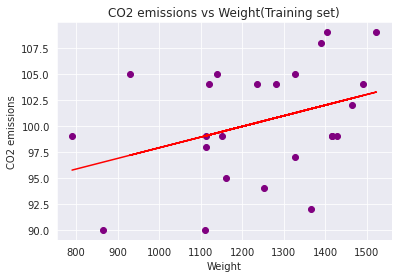

In [ ]:
#visualizing graph for training set
plt.scatter(X1_train, Y1_train, color = 'purple')
plt.plot(X1_train, regressor.predict(X1_train), color = 'red')
plt.title('CO2 emissions vs Weight(Training set)')
plt.xlabel('Weight')
plt.ylabel('CO2 emissions')
plt.show()

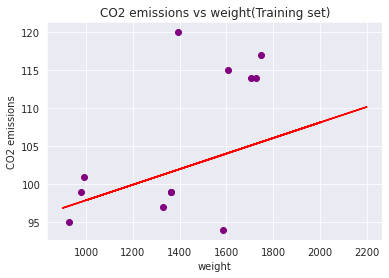

In [ ]:
#visualizing graph for test set
plt.scatter(X1_test, Y1_test, color = 'purple')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('CO2 emissions vs weight(Training set)')
plt.xlabel('weight')
plt.ylabel('CO2 emissions')
plt.show()

In [ ]:
#predicting r values
from scipy import stats
r2 = stats.linregress(X1_train.reshape(1,-1),Y1_train)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [ ]:
r2

LinregressResult(slope=0.010237333780167494, intercept=87.66236422290284, rvalue=0.3647641426225878, pvalue=nan, stderr=nan)

###2. Use multiple regression to predict CO2 emission using both weight and volume


In [ ]:
X2 = df2[['Weight', 'Volume']]
Y2 = df2['CO2']

In [ ]:
print(X2)

    Weight  Volume
0      790    1000
1     1160    1200
2      929    1000
3      865     900
4     1140    1500
5      929    1000
6     1109    1400
7     1365    1500
8     1112    1500
9     1150    1600
10     980    1100
11     990    1300
12    1112    1000
13    1252    1600
14    1326    1600
15    1330    1600
16    1365    1600
17    1280    2200
18    1119    1600
19    1328    2000
20    1584    1600
21    1428    2000
22    1365    2100
23    1415    1600
24    1415    2000
25    1465    1500
26    1490    2000
27    1725    2000
28    1523    1600
29    1705    2000
30    1605    2100
31    1746    2000
32    1235    1600
33    1390    1600
34    1405    1600
35    1395    2500


In [ ]:
print(Y2)

0      99
1      95
2      95
3      90
4     105
5     105
6      90
7      92
8      98
9      99
10     99
11    101
12     99
13     94
14     97
15     97
16     99
17    104
18    104
19    105
20     94
21     99
22     99
23     99
24     99
25    102
26    104
27    114
28    109
29    114
30    115
31    117
32    104
33    108
34    109
35    120
Name: CO2, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, Y2_train)

LinearRegression()

In [ ]:
Y2_pred = regressor.predict(X2_test)
Y2_pred

array([108.54900223, 104.31804036, 102.72161109, 108.2836746 ,
       106.53416307, 102.46647399,  96.10255102,  94.96826943])

##**Q3. Music connoisseurs have been trying for a long time to understand sound and what differentiates one song from another. How to visualise sound. What makes a tone different from another?**

In [ ]:
df3= pd.read_csv("/content/music_data(task2_Q3)")
df3

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.88640,1718.707215,85931.57452,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.93600,1906.468492,99727.03705,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.24630,1561.859087,138762.84190,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.03920,2018.366254,22860.99256,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
df3.to_csv("musicc.csv")

###1. Firstly describe the data and see its shape.


In [ ]:
des = df3.describe() #describing the dataset
des

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455789,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130863e-03,2712.581883,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [ ]:
np.shape(des) #shape of described dataset

(8, 58)

###2. Draw a box plot for the tempos vs labels columns, interpret the box plots

In [ ]:
!pip install seaborn #installing seaborn library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

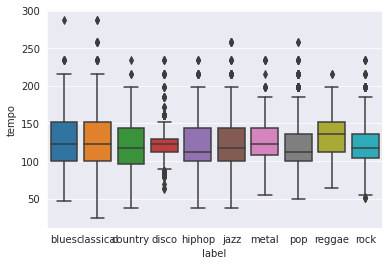

In [ ]:
#boxplot using seaborn
sns.boxplot(x='label', y='tempo', data=df3)

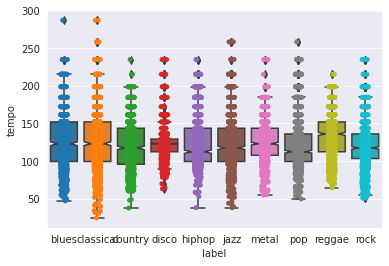

In [ ]:
#The notched boxplot allows to evaluate confidence intervals (by default 95% confidence interval) for the medians of each boxplot.
sns.boxplot(x='label', y='tempo', data=df3, notch=True) 
#The stripplot() function adds the dots, which clearly gives more info on the distribution of points
sns.stripplot(x='label', y='tempo', data=df3) 

##**Interpretation of Boxplot**



*   The bottom of the box is the 25% percentile and the top is the 75% percentile value of the data.
*   So, essentially the box represents the middle 50% of all the datapoints which represents the core region when the data is situated. The height of the boxplot is also called the Inter Quartile Range (IQR), which mathematically is the difference between the 75th and 25th percentile values of the data.

*   The thick line in the middle of the box represents the median. Whereas, the upper and lower whisker marks 1.5 times the IQR from the top (and bottom) of the box.
*   The points that lie outside the whiskers, that is, (1.5 x IQR) in both directions are generally considered as outliers.





**Interpreting the Box plot:** 
Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group.

**1)Obvious differences between box plots:** Any obvious difference between box plots for comparative groups is worthy of further investigation in the Items at a Glance reports.

**2)The sections of the box plot are uneven in size:** The long upper whisker in the means that tempos views are varied amongst the most positive quartile group, and very similar for the least positive quartile group. The Items in Detail reports can be used to explore this further. 

**3)Same median, different distribution:** The medians (which generally will be close to the average) are all at the same level. It always important to consider the pattern of the whole distribution of responses in a box plot.




###3. Now you have to use machine learning classification to predict its genre. Use logistic regression

In [ ]:
import numpy as np

In [ ]:
X3 = df3.iloc[:, :-1].values
Y3 = df3.iloc[:, -1].values

In [ ]:
X3

array([[ 6.61490000e+04,  3.35406363e-01,  9.10482930e-02, ...,
         3.36180725e+01, -2.43026793e-01,  4.37717667e+01],
       [ 6.61490000e+04,  3.43065351e-01,  8.61465260e-02, ...,
         9.70308304e+01,  5.78406334e+00,  5.99430809e+01],
       [ 6.61490000e+04,  3.46814752e-01,  9.22428890e-02, ...,
         5.30508347e+01,  2.51737475e+00,  3.31051216e+01],
       ...,
       [ 6.61490000e+04,  3.47480893e-01,  8.90194400e-02, ...,
         4.85823784e+01, -2.99545288e-01,  4.15869904e+01],
       [ 6.61490000e+04,  3.87527317e-01,  8.48154280e-02, ...,
         2.48436127e+01,  6.75824106e-01,  1.27877502e+01],
       [ 6.61490000e+04,  3.69292945e-01,  8.67586960e-02, ...,
         3.94859009e+01, -3.41253424e+00,  3.17274895e+01]])

In [ ]:
Y3

array(['blues', 'blues', 'blues', ..., 'rock', 'rock', 'rock'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X3_train, Y3_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
Y3_pred = classifier.predict(X3_test)
Y3_pred

array(['reggae', 'pop', 'rock', ..., 'rock', 'blues', 'disco'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y3_test, Y3_pred)
print(cm)
accuracy_score(Y3_test, Y3_pred)

[[188   0  11   3   3  10   9   0   6   6]
 [  2 234   4   0   0   6   0   0   0   1]
 [ 20   0 155   6   5  14   4   4   7  48]
 [  6   1  11 148  14   3   8   9   8  21]
 [ 11   1   3  15 173   1  14  16  24   4]
 [  6  15  11   1   1 199   0   2   7   9]
 [  6   0   4   5   5   1 216   0   1  21]
 [  0   2  14   8   7   2   0 191  11   7]
 [ 12   1  12  10  30   4   0  13 177   6]
 [ 19   0  20  19   9  11  10  10   9 137]]


0.7277822257806245